# Lesson 6 - Session 3 - Examples 2, 3, 4

## Data cleaning 
* Missing values
* Duplicates
* Outliers

https://code.datasciencedojo.com/datasciencedojo/datasets/tree/master/Auto%20MPG

In [27]:
import pandas as pd
import numpy as np
import random

In [28]:
# Load car data, specify column names
df_original = pd.read_csv(
    "../data/auto-mpg.data",
    delim_whitespace=True,
    header=None,
    names=[
        "mpg",
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "year",
        "origin",
        "car_name",
    ],
)
df_original


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [29]:
# inspect types of columns (note that column horsepower is of type object since it contains '?' values)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [30]:
# replace ? values in horsepower column with null values
# copy original dataframe
df = df_original.copy()
df['horsepower'] = df['horsepower'].replace('?', np.NaN)
df['horsepower'] = df['horsepower'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [31]:
# find null values
df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [32]:
# count null values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
car_name        0
dtype: int64

In [33]:
# since only a few null values exist, for experimentation, we randomly inject 
# some missing data # in columns weight (column index = 4) 
# and acceleration (column index = 5)

# for reproducibility we use a seed 
random.seed(42)
rows, _ = df_original.shape
for _ in range(100):
    i, j = random.randint(0,rows-1), random.randint(4,5) 
    df.iat[i,j] = np.NaN    
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,NaN,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,NaN,NaN,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,NaN,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        350 non-null    float64
 5   acceleration  352 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


## Checking for missing values

In [47]:
# find null values
df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,True,True,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,True,False,False,False
396,False,False,False,False,False,False,False,False,False


In [48]:
# count number of null values
df.isnull().sum()

mpg              0
cylinders        0
displacement     0
horsepower       6
weight          48
acceleration    46
year             0
origin           0
car_name         0
dtype: int64

In [36]:
# check for missing values in a column
df['weight'].isnull()

0      False
1      False
2      False
3       True
4      False
       ...  
393     True
394    False
395    False
396    False
397    False
Name: weight, Length: 398, dtype: bool

## Handle missing values

Drop, fill

In [50]:
# drop rows with missing values
df_copy = df.copy()
print(f'Original dataframe shape = {df_copy.shape}')
df_copy.dropna(inplace=True)
print(f'Dataframe shape = {df_copy.shape}')

Original dataframe shape = (398, 9)
Dataframe shape = (305, 9)


In [51]:
# drop columns with missing values
df_copy = df.copy()
print(f'Original dataframe shape = {df_copy.shape}')
df_copy.dropna(axis='columns', inplace=True)
print(f'Dataframe shape = {df_copy.shape}')

Original dataframe shape = (398, 9)
Dataframe shape = (398, 6)


In [53]:
# fill missing values using the mean value 
# alternatively we can use median, mode, 
# or a user specified value
df_copy = df.copy()
# print 5 rows having null weight 
isnull_weight = df_copy['weight'].isnull()
print(df_copy[isnull_weight].iloc[:5,[8,4]])
# compute mean value of column weight
weight_mean = df_copy['weight'].mean()
print(f'{weight_mean=}')
df_copy.fillna(weight_mean, inplace=True)
print(df_copy[isnull_weight].iloc[:5,[8,4]])

                     car_name  weight
3               amc rebel sst     NaN
16                 amc hornet     NaN
23                   bmw 2002     NaN
29               datsun pl510     NaN
35  chevrolet chevelle malibu     NaN
weight_mean=2980.4942857142855
                     car_name       weight
3               amc rebel sst  2980.494286
16                 amc hornet  2980.494286
23                   bmw 2002  2980.494286
29               datsun pl510  2980.494286
35  chevrolet chevelle malibu  2980.494286


## Duplicates

In [40]:
# create a dataframe with duplicated rows taking the 2 first rows of the dataframe, the 3 first rows of the dataframe and concatenate them
tmp1 = df.iloc[:2,:].copy()
tmp2 = df.iloc[:3,:].copy()
df_copy = pd.concat([tmp1, tmp2])
df_copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [41]:
# detect duplicated rows
df_copy.duplicated()

0    False
1    False
0     True
1     True
2    False
dtype: bool

In [42]:
# drop duplicated rows
df_copy.drop_duplicates(inplace=True)
df_copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


## Outliers

In [56]:
# create a dataframe with some outliers
df_copy = df.copy()
random.seed(42) # for reproducible results
for i in (2, 4, 395, 396, 397):
    df_copy.iat[i, 4] *= random.uniform(5,10)
df_copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,18.0,8,307.0,130.0,3504.000000,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.000000,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,28165.352398,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,NaN,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,17676.310474,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,NaN,NaN,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.000000,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,14630.961428,NaN,82,1,dodge rampage
396,28.0,4,120.0,79.0,16054.640938,18.6,82,1,ford ranger


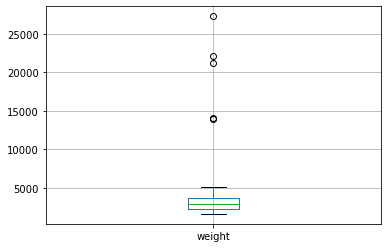

In [44]:
# draw a boxplot of weight values that "reveals" outliers
df_copy.boxplot(column="weight");

In [57]:
# drop outliers (we assume that values greater than 
# mean + 2 * standard deviation are outliers in this problem)
weight_mean = df_copy['weight'].mean()
weight_std = df_copy['weight'].std()
print(f'{weight_mean=}, {weight_std}')
upper = weight_mean + 2 * weight_std
df_copy.drop(df_copy[df_copy['weight'] > upper].index, inplace=True)
df_copy

weight_mean=3225.117925001259, 2281.974836645543


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
3,16.0,8,304.0,150.0,NaN,12.0,70,1,amc rebel sst
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
...,...,...,...,...,...,...,...,...,...
390,32.0,4,144.0,96.0,NaN,NaN,82,3,toyota celica gt
391,36.0,4,135.0,84.0,2370.0,13.0,82,1,dodge charger 2.2
392,27.0,4,151.0,90.0,2950.0,17.3,82,1,chevrolet camaro
393,27.0,4,140.0,86.0,NaN,NaN,82,1,ford mustang gl
